# Гипотезы 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats

In [2]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('our_df.csv')
df

,Unnamed: 0,Number of Rooms,Square,Current Floor,Total Floors,Price,Requisites Checked,Auction,Коричневая,Голубая,...,Metro_Шоссе Энтузиастов,Metro_Щукинская,Metro_Щёлковская,Metro_Электрозаводская,Metro_Юго-Восточная,Metro_Юго-Западная,Metro_Южная,Metro_Ясенево,Metro_р-н Северный,Metro_р-н Южное Бутово
0,0,4,138.0,4,59,74000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,37.1,3,9,13900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,132.0,5,59,75000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,38.0,6,8,13400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,84.0,5,31,35950000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,973,1,34.1,8,9,9000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,974,3,64.0,14,14,14300000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,975,1,31.0,3,9,8550000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,976,1,33.0,4,5,10500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Опираясь на анализ данных, выяснили, что наибольшая корреляция с переменной «Price» наблюдается у переменной «Коричневая ветка метро» (0.254640) 
и у переменной «Голубая ветка метро» (0.150928). Поэтому хотим посмотреть, значительна ли между ними разница математических ожиданий, то есть значительна ли разница между средней ценой квартиры на данных ветках метро. 
 
H0: математическое ожидание цены квартиры на коричневой ветке метро равно математическому ожиданию цены квартиры на голубой ветке метро 
 
Н1: математическое ожидание цены квартиры на коричневой ветки метро не равно математическому ожиданию цены квартиры на голубой ветке метро 
 
Проверять гипотезы будем при уровне значимости - 5%.

Предполагаемый алгоритм: 
1. Возьмем квартиры, которые расположены на голубой или на коричневой ветках метро. Разделим данные квартиры на две выборки: первая – квартиры на голубой ветке метро, вторая – квартиры на коричневой ветке метро. Предварительно мы посчитали количество квартир в каждой выборке, чтобы избежать дисбаланса в них. В итоге, в выборке коричневой ветки - 14 квартир, а в голубой – 33. Видим, дисбаланс в выборках, а главное - немного наблюдений. Следовательно, будем использовать t-статистику. 
2. Проверить независимость этих двух выборок. Выяснили, что корреляция между нашими выборками есть, но очень слабая (0.07). 
3. Рассчитываем p-value, поскольку с помощью нее сможем проверить уровень значимости не только 5%, но и другие (например, 10%). Для построения p-value необходимо найти t-статистику. Для этого считаем дисперсию по выборке, она будет оцененная, так как данных немного (47 квартир).

In [4]:
n_brown = df['Коричневая'].sum()
n_brown

14

In [5]:
n_blue = df['Голубая'].sum()
n_blue

33

In [6]:
df.corr()['Коричневая']['Голубая']

0.0728241104652727

Мы посчитали корреляцию, чтобы убедиться в независимости выборок. Можем увидеть, что значение корреляции близко к нулю. Это может быть обусловлено тем фактом, что существуют такие квартиры, которые расположены рядом с голубой и кольцевой ветками метро (например, Киевская). По этой причине в наши выборки попадают некоторое количество одинаковых наблюдений.

In [10]:
def mean_test(mean, var, n, m, mu_0=0, 
                   alpha=0.05, margin=3):
    """
        Тест для равенства средних с красивейшей визуализацией
    """
    
    t_obs = (mean - mu_0)/np.sqrt(var * (1/n + 1/m))
    

    p_value = 2 * (1 - stats.t.cdf(np.abs(t_obs), df = n + m - 2))
    t_crit = stats.t.ppf(1 - alpha/2, df = n + m - 2)
        
    statistics = ['-t_crit', 't_crit', '-t_obs', 't_obs']
    params = dict(zip(statistics, [(-t_crit, -0.6, -margin, -t_crit, 'b'), 
                                    (t_crit, 0.05, t_crit, margin, 'b'),
                                    (-t_obs, -0.6, -margin, -t_obs, 'r'), 
                                    (t_obs, 0.1, t_obs, margin, 'r')]))

    
    
    x = np.linspace(-margin, margin)
    pdf = stats.t.pdf(x, df = n + m - 2)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.t.pdf(xq, df = n + m - 2)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

In [11]:
alpha = 0.05  
brown = df[(df['Коричневая'] == 1)][' Price']
blue = df[(df['Голубая'] == 1)][' Price']

total_mean = brown.mean() - blue.mean() 
var_0 = ((n_brown - 1) * brown.var() + (n_blue - 1) * blue.var() )/ (n_blue + n_brown - 2)
                                    
t_obs = total_mean/np.sqrt(var_0 * (1 / n_brown + 1 / n_blue))    
t_crit = stats.t.ppf(1 - alpha/2, df = n_brown + n_blue - 2) 

print(f'{t_obs:.3} попадает в ({-t_crit:.3} , {t_crit:.3}) => Нулевая гипотеза НЕ отвергается на уровне значимости 5%')

1.96 попадает в (-2.01 , 2.01) => Нулевая гипотеза НЕ отвергается на уровне значимости 5%


0.05639770003332667

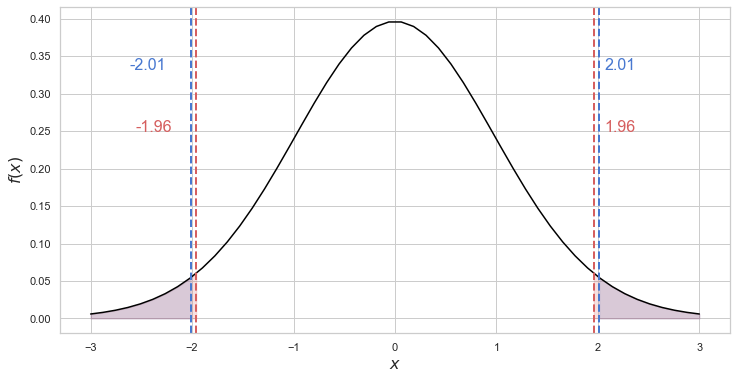

In [15]:
mean_test(total_mean, var_0, n_brown, n_blue, alpha=0.05)

Как мы видим, наше наблюдаемое значение t-статистики не попадает в критическую область, а p-value больше уровня значимости 5%, что говорит о неотвергаемости гипотезы о равенстве математических ожиданий цен на квартиры рядом со станциями метро Коричневой и Голубой веток. 

Тем не менее, стоит заметить, что при анализе значения p-value разница между ним и уровнем значимости совсем небольшая, а значение t-статистики близко к критическому значению.

Так как гипотеза не отвергается, можем думать, что она верна. Поэтому считаем, что математические ожидания цен на квартиры рядом со станциями метро Кольцевой и Голубой веток равны. Это связано, прежде всего, с их местоположением - Центральный и Западный административные районы Москвы, которые являются одними из престижных и дорогих.

Далее мы решили узнать, имеют ли квартиры рядом со станциями метро Кольцевой и Голубой веток одинаковый разброс цен. Поэтому мы сформировали следующие нулевую и альтернативную гипотезы:

Н0: дисперсии цен квартир рядом со станциями метро Коричневой и Голубой веток равны.

Н1: дисперсии цен квартир рядом со станциями метро Коричневой и Голубой веток не равны.

Проверять гипотезы будем при уровне значимости - 5%.

Чтобы проверить гипотезу, воспользуемся F-статистикой. Для этого посчитаем выборочные дисперсии двух выборок (цен на квартиры рядом с Кольцевой и Голубой ветками метро).

In [20]:
brown_var = brown.var()
blue_var = blue.var()

F_obs = brown_var / blue_var  
F_crit_right = stats.f.ppf(1 - alpha/2, n_brown, n_blue) 
F_crit_left = stats.f.ppf(alpha/2, n_brown, n_blue) 

print(f'{F_obs:.3} не попадает в ({F_crit_left:.3} , {F_crit_right:.3}) => Нулевая гипотеза отвергается на уровне значимости 5%')

2.34 не попадает в (0.369 , 2.29) => Нулевая гипотеза отвергается на уровне значимости 5%


Как мы видим, наше наблюдаемое значение F-статистики попадает в критическую область, что говорит об отвергаемости гипотезы о равенстве дисперсий цен на квартиры рядом со станциями метро Коричневой и Голубой веток.

Так как гипотеза отвергается, считаем, что дисперсии цен на квартиры рядом со станциями метро Кольцевой и Голубой веток не равны. Это может быть обусловлено их местоположением, ведь станции метро Коричневой ветки расположены рядом с широким спектром мест, таких как различные парки и скверы, образовательные учреждения, вокзалы. Если близость дома к первым двум типам мест увеличивает рыночную стоимость квартиры, то близость последних двух - уменьшает. 
В это же время станции метро Голубой ветки расположены вблизи с Москва-сити и другими деловыми центрами, Филевским парком и др. Так как все эти факторы оказывают положительное влияние на цену квартир, можем предположить, что апартаменты, находящиеся рядом с Голубой веткой метро, имеют меньшую дисперсию цен, чем квартиры, расположенные у станций метро Коричневой ветки, что и объясняет отвергаемость нулевой гипотезы.